In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame as DF, Series as S
from peakutils import baseline


dry_raw = pd.read_csv('../sis_dataset/drychem.csv')
usda_raw = pd.read_csv("usda_easy.csv")


In [2]:
usda_raw

,smp_id,lat_site,long_site,phosphorus,potassium,nitrogen,4001.65608,3999.72758,3997.79907,3995.87056,...,617.12287,615.19436,613.26585,611.33734,609.40883,607.48032,605.55181,603.6233,601.69479,599.76629
0,55487,40.103054,-123.709442,12.837792,0.439553,0.397704,0.160430,0.160675,0.160882,0.161050,...,1.561697,1.558460,1.555115,1.548652,1.537602,1.522870,1.506778,1.491305,1.477490,1.466077
1,55716,40.580002,-88.368889,4.323957,0.502973,0.329596,0.248092,0.248465,0.248833,0.249167,...,1.678972,1.674033,1.667987,1.659683,1.649768,1.639180,1.628478,1.618195,1.608340,1.598872
2,56801,45.287304,-123.009811,20.374913,0.803999,0.150141,0.374443,0.375440,0.375685,0.375142,...,1.687703,1.678620,1.668340,1.657137,1.643722,1.629398,1.616965,1.606175,1.596150,1.587485
3,83647,39.110748,-95.130142,1.887696,0.456697,0.120603,0.353162,0.353665,0.354140,0.354608,...,1.917255,1.913582,1.907787,1.900400,1.891757,1.881545,1.870923,1.861870,1.855070,1.849780
4,83726,39.273613,-101.112053,9.681377,1.080621,0.242809,0.171357,0.171783,0.172130,0.172437,...,1.541585,1.534682,1.527022,1.517158,1.504447,1.490410,1.477635,1.467167,1.458792,1.451975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,168364,45.413776,-68.934441,36.638793,1.114669,1.665159,0.401323,0.401562,0.401782,0.401985,...,1.561792,1.561613,1.561208,1.560705,1.560037,1.558785,1.557227,1.556153,1.555815,1.555560
5311,168373,45.899055,-68.937469,32.127556,1.556681,2.320301,0.385688,0.385898,0.386087,0.386245,...,1.570942,1.571573,1.571595,1.570872,1.569810,1.568223,1.565750,1.562828,1.560332,1.558665
5312,168711,37.050083,-122.226501,203.943000,1.000051,0.156069,0.251062,0.251545,0.252007,0.252460,...,1.713895,1.705110,1.695535,1.683763,1.671128,1.658790,1.647680,1.639242,1.632877,1.626618
5313,168856,44.287453,-100.339432,46.381404,1.357473,0.275931,0.299812,0.300120,0.300412,0.300715,...,1.702208,1.697075,1.692110,1.685520,1.676505,1.666918,1.658518,1.651312,1.645137,1.640388


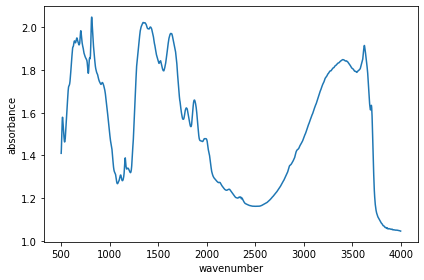

In [42]:
def remove_baseline(vs) -> np.ndarray:
    base = np.apply_along_axis(lambda x: baseline(x, 2), 0, vs)
    base = np.mean(base, axis=0)
    vs = vs - base
    return vs

s = dry_raw.iloc[3, 2:]
int_index = s.index.astype(float).astype(int)
s = S(s.values, index=int_index)
ax = s.plot()
ax.set_xlabel("wavenumber")
ax.set_ylabel("absorbance")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", minor=False) 
# ax.set_xlim(ax.get_xlim()[::-1])
# ax.locator_params(nbins=30, axis='x')
plt.tight_layout()

In [37]:
s.index.astype(float).astype(int)

Int64Index([3996, 3994, 3992, 3990, 3988, 3986, 3984, 3982, 3980, 3978,
            ...
             520,  518,  516,  514,  512,  510,  508,  506,  503,  501],
           dtype='int64', length=1701)

In [23]:
S(dry_raw.iloc[3, 2:].values, index=np.round(dry_raw.iloc[3, 2:].index.astype(float)).astype(int))

3997    1.045477
3995    1.045976
3993    1.046410
3990    1.046750
3988    1.046963
          ...   
510     1.530946
508     1.492587
506     1.456372
504     1.428569
502     1.409740
Length: 1701, dtype: float64

In [4]:
len(dry_raw.index)
dry_raw.id.max()
(dry_raw.version == 1).sum()


3070

In [5]:
dry_raw[dry_raw.version == 0]

def show_missing_ids(df):
    print(f'missing ids: {set(range(df.id.max())) - set(df.id)}')
    
ver0 = dry_raw[dry_raw.version == 0]
ver1 = dry_raw[dry_raw.version == 1]

for df in [dry_raw, ver0, ver1]:
    show_missing_ids(df)

missing ids: {51, 230}
missing ids: {1538, 516, 2572, 530, 2579, 3093, 2072, 2586, 2075, 2587, 3101, 2598, 552, 1579, 557, 558, 559, 1072, 51, 2101, 2617, 2109, 2634, 2636, 2638, 1107, 596, 92, 1120, 2656, 3172, 3175, 2153, 1139, 2163, 117, 2676, 119, 2182, 1672, 1673, 2194, 2709, 2200, 2715, 2717, 2718, 2719, 1185, 1187, 2724, 2734, 2745, 2238, 2242, 2773, 2262, 2784, 230, 2279, 240, 2821, 2310, 1802, 2827, 2828, 2320, 2836, 2340, 2857, 1840, 2353, 1330, 315, 1339, 1340, 2365, 319, 2368, 2879, 1353, 1355, 345, 350, 1380, 1896, 1897, 2930, 371, 373, 375, 377, 1410, 390, 391, 904, 1422, 1943, 920, 2459, 1948, 1441, 418, 1969, 1458, 1467, 1470, 962, 451, 1990, 974, 982, 3037, 993, 2531, 3050, 3053, 1520, 1521, 1527, 509}
missing ids: {1538, 516, 519, 3082, 3083, 2061, 529, 530, 537, 2073, 2075, 2586, 3114, 1579, 557, 558, 559, 1581, 51, 2101, 2615, 56, 1090, 3141, 1094, 2558, 584, 2630, 3154, 1107, 87, 3165, 2142, 3174, 1139, 1672, 2186, 2189, 2192, 2193, 1171, 1172, 1174, 2727, 2221, 27

In [6]:
sis_freqs = pd.to_numeric(dry_raw.columns[2:])
usda_freqs = pd.to_numeric(usda_raw.columns[6:])
def first_diffs(s):
    return s[:-1] - s[1:]

first_diffs(usda_freqs)
first_diffs(sis_freqs)
len(usda_freqs)
len(sis_freqs)
sis_freqs

Float64Index([3996.6127114909577, 3994.5569919104455,  3992.501272329933,
              3990.4455527494215,  3988.389833168909,  3986.334113588397,
               3984.278394007885,  3982.222674427373,   3980.16695484686,
               3978.111235266349,
              ...
               520.3909008449073,   518.335181264395,  516.2794616838828,
               514.2237421033706,  512.1680225228588, 510.11230294234656,
               508.0565833618343,  506.0008637813221, 503.94514420080986,
               501.8894246202981],
             dtype='float64', length=1701)

In [7]:
dry_corr = dry_raw.corr().iloc[2:,2:]

KeyboardInterrupt: 

<AxesSubplot:xlabel='difference in wavenumber', ylabel='mean correlation'>

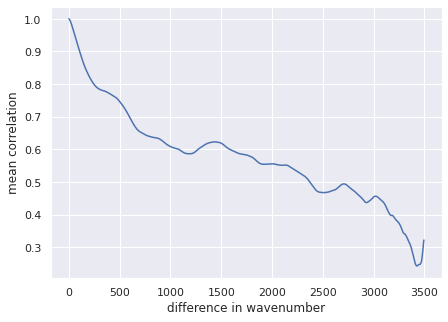

In [ ]:
diagonals_means = [dry_corr.values.diagonal(i).mean() for i in range(len(dry_corr.index))]

freqs_numeric = pd.to_numeric(dry_corr.index)
deltas = freqs_numeric[::-1] - freqs_numeric[-1]

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
data=DF(deltas, diagonals_means)

sns.lineplot(data=DF({"difference in wavenumber":deltas, "mean correlation": diagonals_means}),x="difference in wavenumber",y="mean correlation", ax=ax)



In [ ]:
avg_spec_df = None


In [ ]:
sample = ver0.iloc[373, 2:]


def set_draw_options(fig, ax, spectra=True):
    """
    warning: this operation isn't idempotent
    """
    if spectra:
        ax.set_xlim(ax.get_xlim()[::-1])
        ax.locator_params(nbins=35, axis='x')

    fig.set_size_inches(22, 16, forward=True)

def draw_avg_spec(specs, fig=None, ax=None):
    global avg_spec_df
    if avg_spec_df is None:
       df = pd.DataFrame({'absorbance': np.median(specs, axis=0), 'wavenumber': specs.columns.values, 'stds': np.std(specs, axis=0)})
       avg_spec_df = df
    else:
        df = avg_spec_df

    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1)
        sns.lineplot(data=df, x='wavenumber', y='absorbance', ax=ax)
        ax.fill_between(df['wavenumber'], df['absorbance'] - df['stds'], df['absorbance'] + df['stds'], alpha=0.2)
        set_draw_options(fig, ax)
    else:
        sns.lineplot(data=df, x='wavenumber', y='absorbance', ax=ax)
        ax.fill_between(df['wavenumber'], df['absorbance'] - df['stds'], df['absorbance'] + df['stds'], alpha=0.2)





np.median(ver0, axis=0).shape
ver0




,id,version,3996.6127114909577,3994.5569919104455,3992.501272329933,3990.4455527494215,3988.389833168909,3986.334113588397,3984.278394007885,3982.222674427373,...,520.3909008449073,518.335181264395,516.2794616838828,514.2237421033706,512.1680225228588,510.11230294234656,508.0565833618343,506.0008637813221,503.94514420080986,501.8894246202981
0,0,0,1.138406,1.138832,1.139270,1.139741,1.140248,1.140755,1.141226,1.141644,...,1.813950,1.833377,1.839277,1.828456,1.803945,1.773136,1.744298,1.723677,1.713572,1.711467
2,1,0,1.074261,1.074653,1.075037,1.075414,1.075777,1.076110,1.076395,1.076618,...,1.486986,1.496266,1.502550,1.506598,1.510251,1.513344,1.511145,1.496424,1.466463,1.426190
4,2,0,1.161442,1.162095,1.162635,1.163084,1.163487,1.163856,1.164177,1.164415,...,1.581957,1.579538,1.571461,1.561230,1.551352,1.542240,1.533700,1.526889,1.524087,1.524949
6,3,0,1.105899,1.106266,1.106692,1.107201,1.107781,1.108410,1.109071,1.109734,...,1.482036,1.492742,1.497126,1.498483,1.500414,1.502225,1.498912,1.485825,1.462762,1.433744
8,4,0,1.096679,1.097052,1.097358,1.097629,1.097903,1.098194,1.098513,1.098873,...,1.871913,1.877938,1.891375,1.910686,1.927759,1.929862,1.907906,1.869773,1.839438,1.837342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,3178,0,1.087380,1.087480,1.087573,1.087652,1.087746,1.087898,1.088111,1.088335,...,2.126918,2.109242,2.098960,2.093824,2.082466,2.054714,2.007063,1.942579,1.872346,1.811446
6352,3179,0,1.075436,1.075540,1.075769,1.076102,1.076457,1.076782,1.077062,1.077306,...,1.974074,1.993143,2.008546,2.005742,1.966613,1.885178,1.783262,1.694190,1.640056,1.627058
6354,3180,0,1.031646,1.031751,1.031784,1.031712,1.031569,1.031456,1.031475,1.031660,...,1.954377,1.965318,1.984370,2.004318,2.005904,1.969208,1.897496,1.812571,1.734319,1.680112
6356,3181,0,1.086864,1.087192,1.087599,1.088035,1.088399,1.088635,1.088752,1.088792,...,1.917056,1.915483,1.900556,1.883240,1.866252,1.842607,1.807792,1.767364,1.734210,1.720848


In [ ]:
ver1.iloc[:,2:]

,3996.6127114909577,3994.5569919104455,3992.501272329933,3990.4455527494215,3988.389833168909,3986.334113588397,3984.278394007885,3982.222674427373,3980.16695484686,3978.111235266349,...,520.3909008449073,518.335181264395,516.2794616838828,514.2237421033706,512.1680225228588,510.11230294234656,508.0565833618343,506.0008637813221,503.94514420080986,501.8894246202981
1,1.066606,1.066879,1.067193,1.067556,1.067959,1.068400,1.068905,1.069491,1.070137,1.070790,...,1.417465,1.423727,1.430032,1.437367,1.445265,1.452163,1.457067,1.458576,1.453195,1.438692
3,1.045477,1.045976,1.046410,1.046750,1.046963,1.047060,1.047126,1.047276,1.047571,1.047942,...,1.550281,1.566070,1.578158,1.578756,1.562382,1.530946,1.492587,1.456372,1.428569,1.409740
5,1.120342,1.121044,1.121519,1.121766,1.121899,1.122048,1.122301,1.122675,1.123126,1.123559,...,1.244697,1.255055,1.264689,1.274432,1.284353,1.292202,1.293420,1.283665,1.262656,1.234763
7,1.128943,1.129624,1.130223,1.130761,1.131266,1.131748,1.132228,1.132733,1.133254,1.133758,...,1.440131,1.449532,1.454879,1.454247,1.447639,1.437258,1.427521,1.425879,1.442643,1.483942
9,1.091129,1.091748,1.092334,1.092881,1.093404,1.093917,1.094444,1.095001,1.095532,1.095957,...,1.463288,1.473775,1.488986,1.505121,1.515297,1.513427,1.498629,1.476744,1.457312,1.447150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,1.101433,1.101786,1.102149,1.102468,1.102677,1.102749,1.102706,1.102607,1.102554,1.102592,...,2.122108,2.143857,2.133059,2.101624,2.053017,1.992681,1.932580,1.877864,1.823669,1.759135
6353,1.058427,1.058564,1.058683,1.058787,1.058884,1.058983,1.059092,1.059220,1.059400,1.059627,...,1.658207,1.669959,1.675577,1.672915,1.660496,1.638547,1.610411,1.581902,1.556767,1.531098
6355,1.074402,1.074529,1.074662,1.074800,1.074933,1.075053,1.075168,1.075290,1.075441,1.075612,...,1.941374,1.917730,1.902440,1.899366,1.908146,1.930918,1.975911,2.054488,2.172976,2.302814
6357,1.108234,1.108375,1.108496,1.108616,1.108777,1.108995,1.109235,1.109432,1.109555,1.109621,...,1.854802,1.864490,1.875512,1.885007,1.890196,1.891861,1.894835,1.897565,1.883177,1.834084


In [ ]:
sis_specs = dry_raw.iloc[:, 2:]
usda_specs = usda_raw.iloc[:, 6:]
sis_specs["dataset"] = "IndiaSIS"
sis_specs
usda_specs

,4001.65608,3999.72758,3997.79907,3995.87056,3993.94205,3992.01354,3990.08503,3988.15652,3986.22801,3984.2995,...,617.12287,615.19436,613.26585,611.33734,609.40883,607.48032,605.55181,603.6233,601.69479,599.76629
0,0.160430,0.160675,0.160882,0.161050,0.161235,0.161455,0.161697,0.161950,0.162095,0.162170,...,1.561697,1.558460,1.555115,1.548652,1.537602,1.522870,1.506778,1.491305,1.477490,1.466077
1,0.248092,0.248465,0.248833,0.249167,0.249480,0.249777,0.250055,0.250315,0.250500,0.250677,...,1.678972,1.674033,1.667987,1.659683,1.649768,1.639180,1.628478,1.618195,1.608340,1.598872
2,0.374443,0.375440,0.375685,0.375142,0.374437,0.374082,0.374365,0.375358,0.376530,0.377327,...,1.687703,1.678620,1.668340,1.657137,1.643722,1.629398,1.616965,1.606175,1.596150,1.587485
3,0.353162,0.353665,0.354140,0.354608,0.355098,0.355598,0.356133,0.356668,0.357060,0.357395,...,1.917255,1.913582,1.907787,1.900400,1.891757,1.881545,1.870923,1.861870,1.855070,1.849780
4,0.171357,0.171783,0.172130,0.172437,0.172788,0.173165,0.173575,0.173997,0.174285,0.174478,...,1.541585,1.534682,1.527022,1.517158,1.504447,1.490410,1.477635,1.467167,1.458792,1.451975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,0.401323,0.401562,0.401782,0.401985,0.402187,0.402373,0.402543,0.402665,0.402712,0.402768,...,1.561792,1.561613,1.561208,1.560705,1.560037,1.558785,1.557227,1.556153,1.555815,1.555560
5311,0.385688,0.385898,0.386087,0.386245,0.386398,0.386533,0.386650,0.386730,0.386728,0.386730,...,1.570942,1.571573,1.571595,1.570872,1.569810,1.568223,1.565750,1.562828,1.560332,1.558665
5312,0.251062,0.251545,0.252007,0.252460,0.252933,0.253397,0.253840,0.254270,0.254692,0.255090,...,1.713895,1.705110,1.695535,1.683763,1.671128,1.658790,1.647680,1.639242,1.632877,1.626618
5313,0.299812,0.300120,0.300412,0.300715,0.301048,0.301372,0.301652,0.301843,0.301905,0.302007,...,1.702208,1.697075,1.692110,1.685520,1.676505,1.666918,1.658518,1.651312,1.645137,1.640388


In [ ]:
# investigate zero absorbance

specs = ver1.iloc[:, 2:]
specs.idxmin()

(specs < 0.1).sum(axis=1)



3402